In [1]:
from coders import FeatureASK as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[22448] Lock acquired: 10


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 933/642/326
Gen average time: 0:00:15.659052
Gen 2 grades: 1400/1020/591
Gen average time: 0:00:14.957336
Gen 3 grades: 1400/1275/893
Gen average time: 0:00:11.482278
Gen 4 grades: 1575/1359/940
Gen average time: 0:00:09.733007
Gen 5 grades: 1670/1509/1035
Gen average time: 0:00:08.822803
Gen 6 grades: 2059/1560/1005
Gen average time: 0:00:06.816486
Gen 7 grades: 2152/1502/961
Gen average time: 0:00:04.913340
Gen 8 grades: 1980/1558/973
Gen average time: 0:00:04.916836
Gen 9 grades: 1768/1397/887
Gen average time: 0:00:04.935673
Gen 10 grades: 1400/1151/772
Gen average time: 0:00:04.894919
Gen 11 grades: 1530/1288/787
Gen average time: 0:00:04.822856
Gen 12 grades: 1322/1174/778
Gen average time: 0:00:04.788973
Gen 13 grades: 1733/1266/755
Gen average time: 0:00:04.782029
Gen 14 grades: 1494/1156/762
Gen average time: 0:00:04.755974
Gen 15 grades: 1622/1319/913
Gen average time: 0:00:04.591718
Gen 16 grades: 1364/1237/836
Gen average time: 0:00:04.389752
Gen 17 grades: 19

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

2210495734112


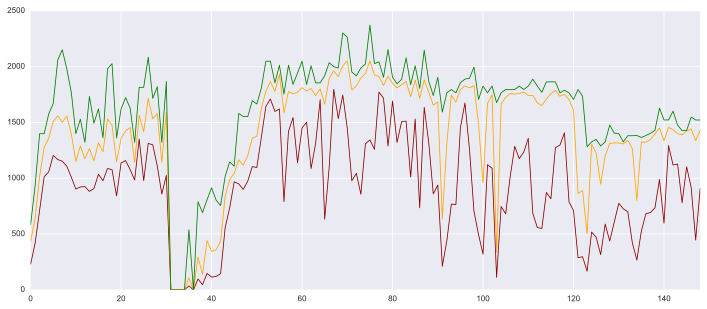

In [5]:
id_ = id(pipeline)
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(id_)
plt.savefig('out/{}_GA_{}.pdf'.format(Coder.__name__, id_), bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000)[:3]:
    print(*coder_fitness(0)(c, raw=True))
    print(c)

1655.1724137931035 0.9933333333333333
FeatureASK:
    filter_shape: 0.6164938616286036
    amplitude: 0.23970697711702255
    peak_width_span: 0.6421288267407381
    peak_width_start: 0.4904555884964299
    filter_type: 1
    symbol_width: 1
    frequency: 1934
    high_amplitude: 0.7139820559327265
    filter_std_base: 13
    sqe_end_v: 0.5794576797416912
    rate: 96000
    sqe_end: 0.13000712119621274
    peak_threshold: 0.4889214333808563
    d_high_amplitude: 0.0929435298686865
    symbol_duration: 0.0006028779573473956
    d_low_amplitude: 0.5776657486487666
    sqe_start_v: 0.18014649310886302
    low_amplitude: 0.00737445929745878
    filter_std_scale: 0.08444221545731578
    filter_window_base: 1
    sqe_start: 0.11799679014419881
    filter_window_scale: 0.11123677864637244
1500.0 0.9866666666666667
FeatureASK:
    filter_shape: 0.6164938616286036
    amplitude: 0.14070481895723574
    peak_width_span: 0.47873999146837987
    peak_width_start: 0.35692426468696525
    filter_t